In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from causalpy import LinearGaussianBN
%matplotlib inline

In [2]:
model = LinearGaussianBN()
model.add_var('Z')
model.add_var('A',['Z'])
model.add_var('B',['Z'])
model.add_var('C')
model.add_var('D')
model.add_var('Y',['Z','A','B','C','D'])

p_y = model.observe(['A','B','C','D'],['a','b','c','d']).marginal(['Y'])

NameError: name 'LinearGaussianBN' is not defined

In [4]:
model = LinearGaussianBN()
model.add_var('Z')
model.add_var('X',['Z'])
model.add_var('Y',['Z'])

p_y = model.marginal(['X','Y'])


Assume the counterfactual variables $Y_t$ and $Y_c$ are jointly normal with a common variance.

Their difference Y_t - Y_c will also be normal. 

## Counterfactual nature of regret

In [19]:
regret_dist = norm(loc=T*(mu_t - mu_c),scale = np.sqrt(T*2*(1-rho)*s**2))


array([  1.91504473,   1.93123083,   1.94741692,   1.96360302,
         1.97978912,   1.99597521,   2.01216131,   2.02834741,
         2.0445335 ,   2.0607196 ,   2.0769057 ,   2.09309179,
         2.10927789,   2.12546399,   2.14165008,   2.15783618,
         2.17402228,   2.19020837,   2.20639447,   2.22258057,
         2.23876666,   2.25495276,   2.27113886,   2.28732495,
         2.30351105,   2.31969715,   2.33588324,   2.35206934,
         2.36825544,   2.38444153,   2.40062763,   2.41681373,
         2.43299982,   2.44918592,   2.46537202,   2.48155811,
         2.49774421,   2.51393031,   2.5301164 ,   2.5463025 ,
         2.5624886 ,   2.57867469,   2.59486079,   2.61104689,
         2.62723298,   2.64341908,   2.65960518,   2.67579127,
         2.69197737,   2.70816346,   2.72434956,   2.74053566,
         2.75672175,   2.77290785,   2.78909395,   2.80528004,
         2.82146614,   2.83765224,   2.85383833,   2.87002443,
         2.88621053,   2.90239662,   2.91858272,   2.93

In [18]:
np.linspace?

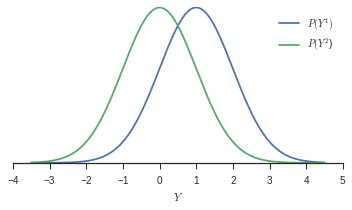

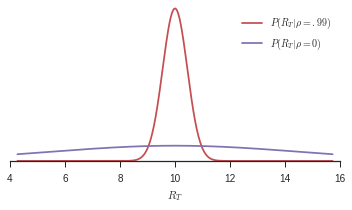

In [25]:
# plot the marginals and the individual causal effect distributions.
from scipy.stats import norm

def regret_dist(mu_t,mu_c,s,rho,T):
    return norm(loc=T*(mu_t - mu_c),scale = np.sqrt(T*2*(1-rho)*s**2))
    

x = np.linspace(-3.5,4.5,1000)

s = 1
mu_t = 1
mu_c = 0
T = 10

py_do_t = norm.pdf(x,loc = mu_t ,scale=s)
py_do_c = norm.pdf(x,loc = mu_c, scale=s)

#sns.set_style("whitegrid")
sns.set_style("ticks")


fig,ax = plt.subplots(1,figsize=(5,3))

ax.plot(x,py_do_t,label="$P(Y^1)$")
ax.plot(x,py_do_c,label = "$P(Y^2$)")
ax.set_xlabel("$Y$")
ax.legend(loc="upper right")
ax.yaxis.set_visible(False)
sns.despine()
ax.spines['left'].set_visible(False)
plt.tight_layout()
fig.savefig('counterfactual_nonidentify_a.pdf', format='pdf', dpi=1200)

fig2,ax2 = plt.subplots(1,figsize=(5,3))

regret_dist1 = regret_dist(mu_t,mu_c,s,.99,T)
regret_dist2 = regret_dist(mu_t,mu_c,s,0,T)
x = np.linspace(*regret_dist2.ppf([0.1,0.9]),num=1000)

ax2.plot(x,regret_dist1.pdf(x),label = "$P(R_T | \\rho = .99)$",color=sns.color_palette()[2])
ax2.plot(x,regret_dist2.pdf(x),label = "$P(R_T | \\rho = 0)$",color=sns.color_palette()[3])

#ax[1].plot(x,tau(x,mu_t,mu_c,s,-.99),label = "$f(\\tau | \\rho = -.99)$")
ax2.set_xlabel("$R_T$")
ax2.legend(loc="upper right")
ax2.yaxis.set_visible(False)
sns.despine()
ax2.spines['left'].set_visible(False)
plt.tight_layout()
fig2.savefig('counterfactual_nonidentify_b.pdf', format='pdf', dpi=1200)

## Original problem modified from Dawid

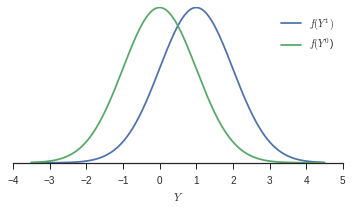

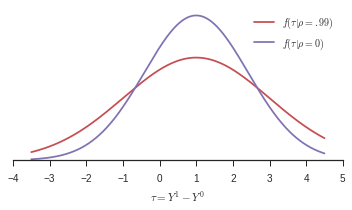

In [5]:
# plot the marginals and the individual causal effect distributions.
from scipy.stats import norm

def tau(x,mu_t,mu_c,s,rho):
    return norm.pdf(x,loc=mu_t - mu_c,scale = np.sqrt(2*(1-rho)*s**2))

x = np.linspace(-3.5,4.5,1000)

s = 1
rho = -0.99
mu_t = 1
mu_c = 0

py_do_t = norm.pdf(x,loc = mu_t ,scale=s)
py_do_c = norm.pdf(x,loc = mu_c, scale=s)

#sns.set_style("whitegrid")
sns.set_style("ticks")


fig,ax = plt.subplots(1,figsize=(5,3))

ax.plot(x,py_do_t,label="$f(Y^1)$")
ax.plot(x,py_do_c,label = "$f(Y^0$)")
ax.set_xlabel("$Y$")
ax.legend(loc="upper right")
ax.yaxis.set_visible(False)
sns.despine()
ax.spines['left'].set_visible(False)
plt.tight_layout()
fig.savefig('counterfactual_nonidentify_a.pdf', format='pdf', dpi=1200)

fig2,ax2 = plt.subplots(1,figsize=(5,3))
ax2.plot(x,tau(x,mu_t,mu_c,s,-.99),label = "$f(\\tau | \\rho = .99)$",color=sns.color_palette()[2])
ax2.plot(x,tau(x,mu_t,mu_c,s,0),label = "$f(\\tau | \\rho = 0)$",color=sns.color_palette()[3])
#ax[1].plot(x,tau(x,mu_t,mu_c,s,-.99),label = "$f(\\tau | \\rho = -.99)$")
ax2.set_xlabel("$\\tau = Y^1 - Y^0$")
ax2.legend(loc="upper right")
ax2.yaxis.set_visible(False)
sns.despine()
ax2.spines['left'].set_visible(False)
plt.tight_layout()
fig2.savefig('counterfactual_nonidentify_b.pdf', format='pdf', dpi=1200)

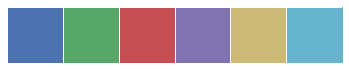

In [53]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [77]:
current_palette[2]

(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

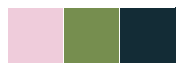

In [73]:
sns.palplot(sns.cubehelix_palette(3,start=0, rot=-.9))

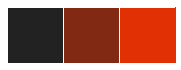

In [74]:
sns.choose_dark_palette()

There is a confounder effecting how well people do both with and without treatment. If we observed this confounder, then we would choose the best course of action for each individual depending on their observed characteristics. 

If the variance is low (for the effect of the treatment) then looking for personalization characteristics is less of a priority. 


Assume with have a large experimental data set. 

The marginals are the same. 

Imagine we have a hidden attribute that determines how well you will do (either in treatment and control). Since this attribute is not observed, there can be significant variance for both the marginal distributions over treatment and control. However, the true individual causal effect has very low variance. 

What if we were able to observe this hidden attribute? 

$Y_t $

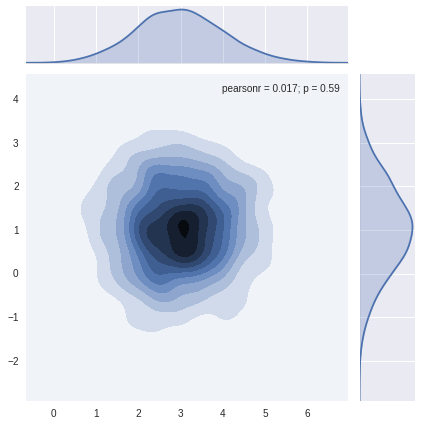

In [21]:
mean = np.asarray([3,1])
cov = np.asarray([[1,0],[0,1]])
Y_cf = np.random.multivariate_normal(mean, cov, size = 1000) # this seems to pre-suppose a joint distribution is properly defined.
Y_t,Y_c = Y_cf[:,0],Y_cf[:,1]
sns.jointplot(x=Y_t, y=Y_c, kind="kde")

(array([   6.,   21.,   69.,  134.,  233.,  252.,  170.,   76.,   30.,    9.]),
 array([-2.5721533 , -1.68565492, -0.79915653,  0.08734185,  0.97384023,
         1.86033861,  2.746837  ,  3.63333538,  4.51983376,  5.40633215,
         6.29283053]),
 <a list of 10 Patch objects>)

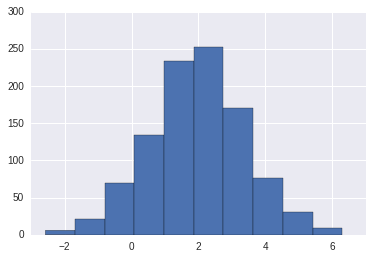

In [22]:
ICE = Y_t - Y_c
plt.hist(ICE)

In [ ]:
P(Y|do(T=t))
P(Y|do(T=c))